# Modern GANs

In this lesson, we will cover how the GAN architectural paradigm has been rethought over the last few years. We will cover topics such as the:
- Wasserstein GAN architecture
- Gradients to improve GAN training stability
- Growing architectures generators and discriminators
- StyleGAN model

Rethinking GAN Architecture:
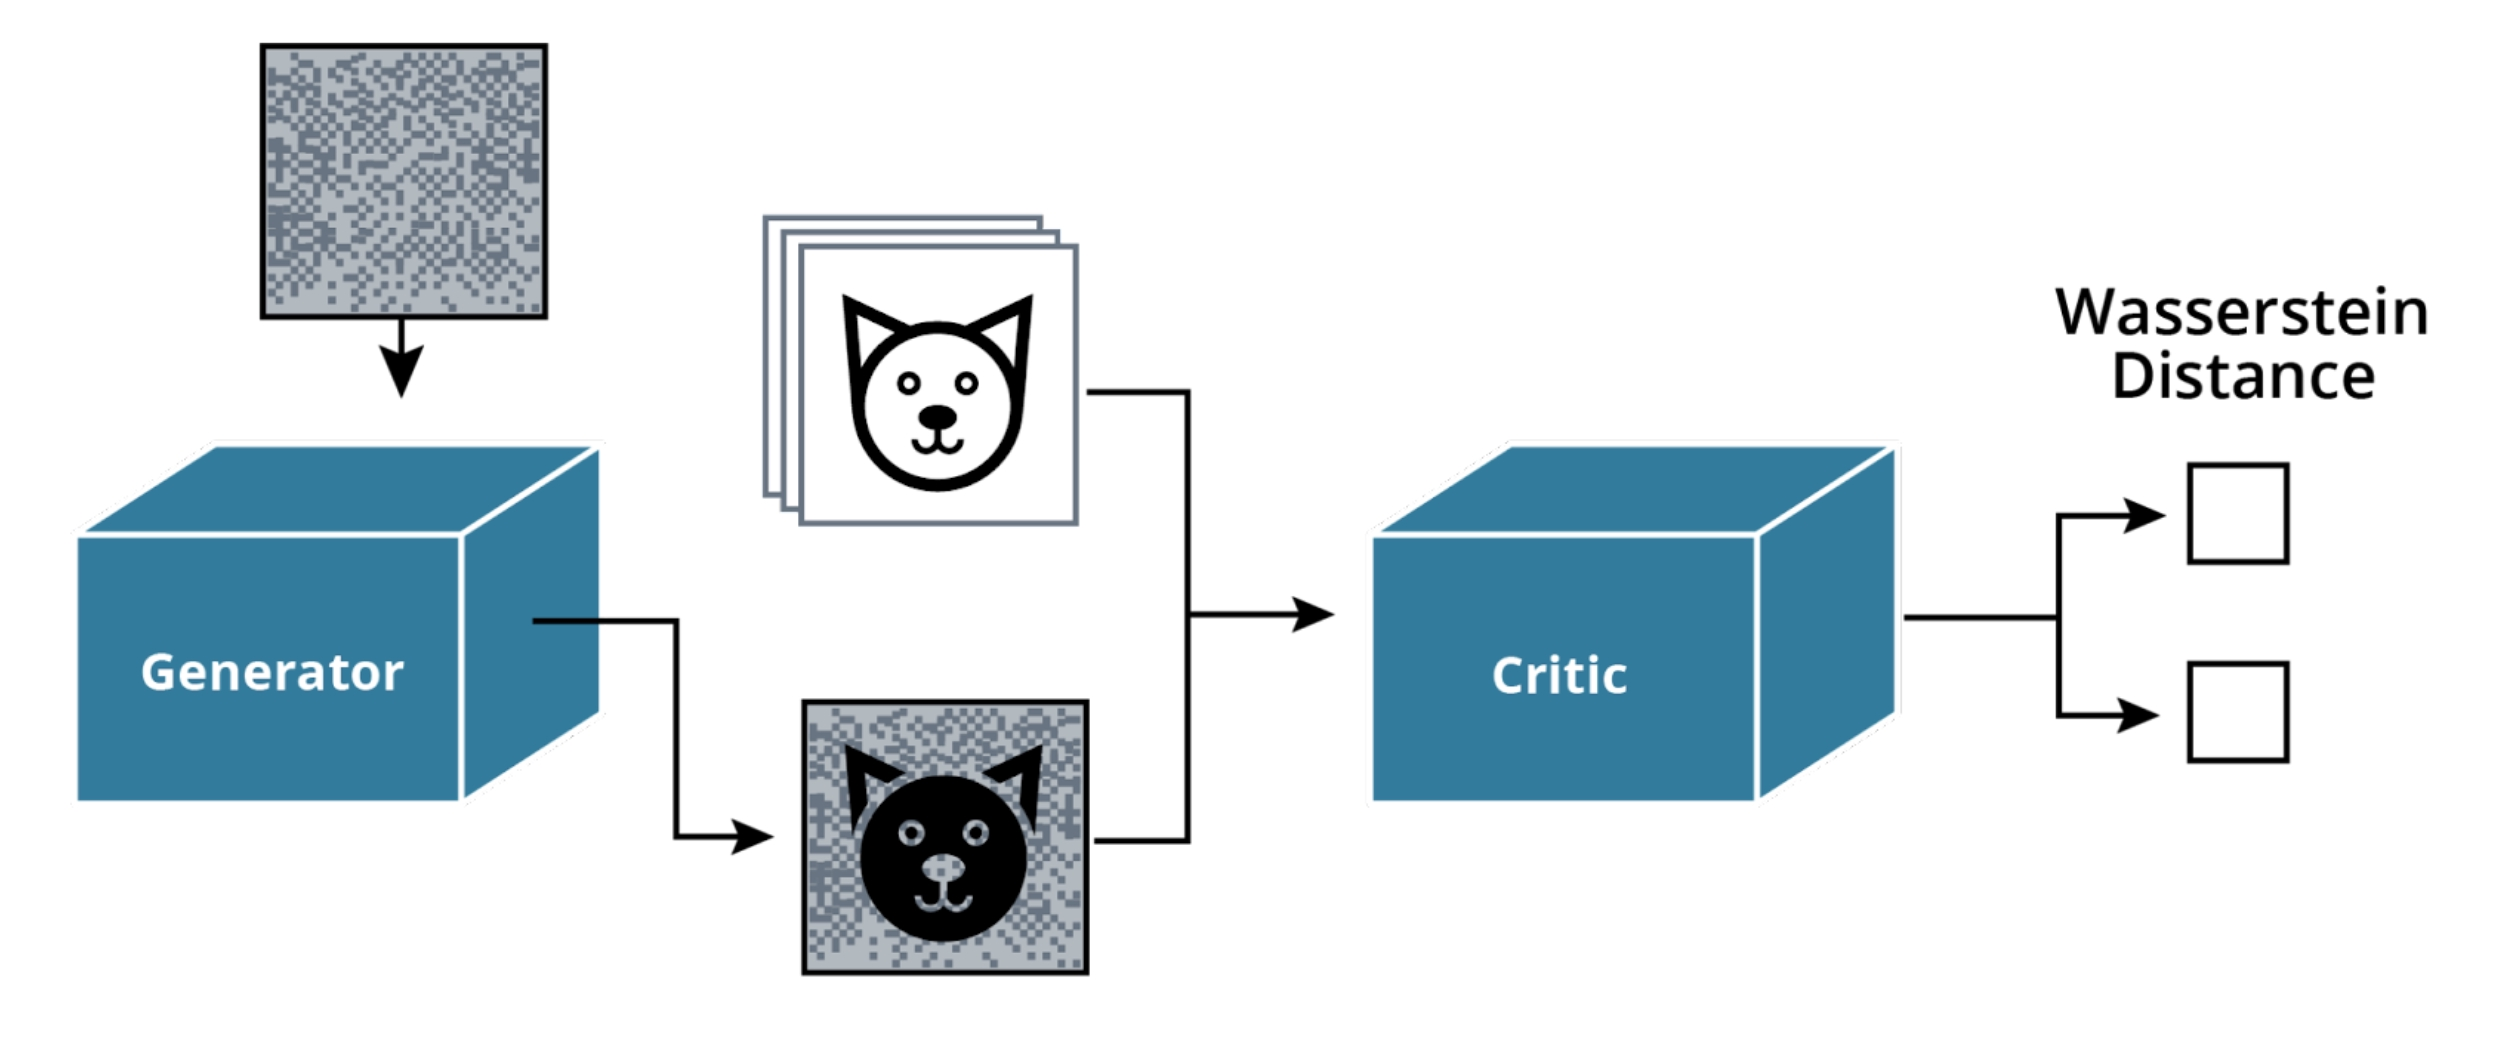

## Limitations of BCE Loss

BCE = Binary Cross Entropy loss

GANs are harder to train then other network classifiers since we need to optimize two networks: a generator and discriminator. Also reffered to as the **minimax** game.

Common problems with GANs:
- **Mode Collapse** occurs when the generator only creates some of the modes of the real distribution:
  - Generator get 'stuck' on a single mode (e.g. a certain face)
  - Generator is not penalized for focusing on a single mode with BCE loss
- **Vanishing Gradient** occurs when the discriminator loss reaches zero and the generator is not learning anymore:
  - The discriminators task to identify fake images is extremely easy in the beginning of the training process
  - So when the discriminator overpowers the generator and no information is back-propagated into the generator
 
## Wasserstein Loss

We need a new metric that 
- prevents mode collapse and
- does not have zero gradient even when the real and fake distributions are very different

Wasserstein distance solves this: instead of having a loss function that classifies a distribution as being real or not, we have a loss function that tries to minimize the distance between the real and the fake distribution. The difference is subtle but plays a big role in the stability of GANs.

**Earth Mover's Distance** or **Wasserstein metric**:
- Discriminator is called **Critic** because it dot not discriminate anymore between fake and real images

With the Wasserstein distance the discriminator is called Critic. The Critic:
- Does not discriminate between real and fake anymore but instead measures the distance between both distributions.
- Will try to maximize this expression.
- Wants to maximize the score of the real distribution and minimize the score of the fake distribution, which is similar to maximizing its inverse.

The generator will try to maximize the critic score of the fake distribution, which is similar to minimizing it with the flipped label.

## Progressive Growing of GANs
To make training even more stable, the ProGAN model was developed and the current resolution is 16x16.

How ProGAN works:
- It adds a new layer to the generator and a new layer to the discriminator by fading the layers in smoothly.
- In the generator, the resolution of the 16x16 layer is doubled using an interpolation method such as nearest neighbor. The output of the 32x32 layer is then fused with this interpolated output.
- In the discriminator, the output of the 32x32 layer is fused with a downsampled image.
- A pooling method such as average pooling is used for downsampling.

**Fading layer** = a new layer in the generator and the discriminator that doubles the resolution of the 16x16 layer using an interpolation method such as nearest neighbor.

### ProGAN tricks
- Progressive Growing – Progressively train layers and increase resolution
- Minibatch Discrimination – Enforce fake and real batches to have similar statistics
- Equalized Learning Rates – Scale the weights of each layer by a different constant to make sure the layers are learning at the same speed
- Pixelwise Normalization – Normalize each pixel of a feature map along the channel axis

### Pixelwise normalisation
Different types of normalisation:
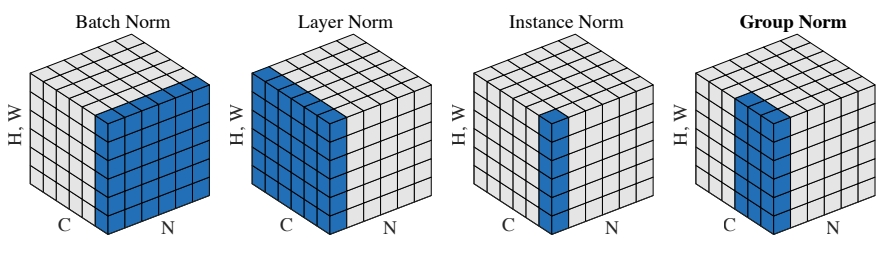

C is the channel dimensions, N the batch dimension and H,W the spatial dimensions. For example, for a batch normalization layer, we calculate mean and variance over the batch and spatial dimensions, so we have a pair of (mean, variance) values for each channel.

- In Batch Normalization, we normalize pixels of the same channel, accross the batch and spatial dimensions.
- In Layer Normalization, we normalize pixels of the same batch index, accross the channel and spatial dimensions.
- In Instance Normalization, we normalize pixels of the same batch index and channel, accross the spatial dimensions only.
- In Group Normalization, we group pixels of the batch index together.

## StyleGAN
This model is revolutionary in the world of GANs: it made high-resolution images possible.

> Deep learning is a somewhat recent field and many consider the 2012 AlexNet paper as the starting point of the deep learning revolution. The progress in creating realistic generated images is most exemplified by the StyleGAN paper in 2019 as it was the first architecture to produce very high-quality samples.

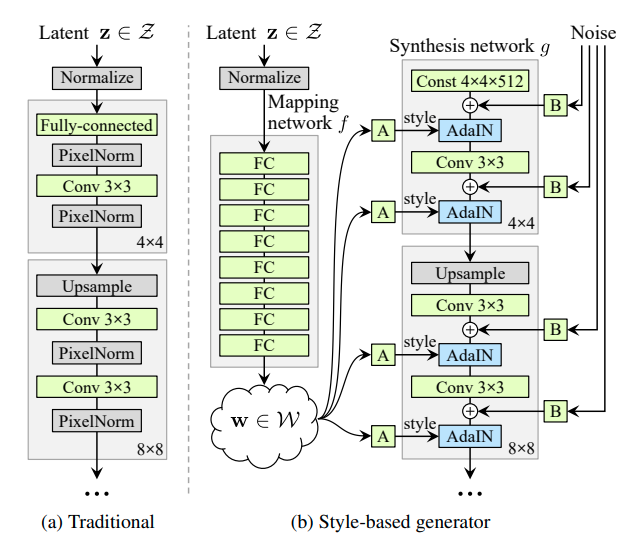

### Traditional Generator
For a traditional generator:
- We input a latent vector z
- Run it through a bunch of fully connected, convolution and normalization layers
- Get a generated RGB image

### StyleGAN Generator
For the StyleGAN generator :
- There is a new network, only made of fully connected layer, the **mapping network**, and it is taking the latent vector and outputs a new latent vector w.
- Add **noise** at multiple places in the network, always after the convolution layers.
- StyleGAN uses a new type of normalization layer, the **adaptive instance normalization layer, or AdaIn**.

## StyleGAN components

### Mapping Network
The mapping network is a new component of the StyleGAN generator. A mapping network:
- Takes the latent vector z as input
- Outputs a new latent vector w
- Helps to disentangle the latent vector z for controllable generation.

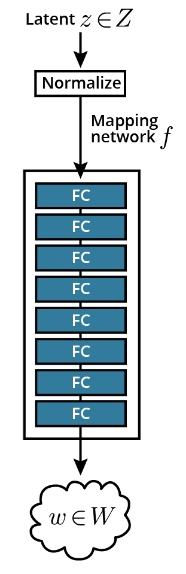

### Noise Injection
Another new component of StyleGAN is the injection of noise at different locations in the generator. This noise injection will:
- Help with stochastic variation! Injecting noise in the network will help create more diverse features.
- Happen at different locations in the network and impacts the variability of the images at different levels.

To add noise:
1. A random feature map is sampled from a gaussian distribution
2. The map is multiplied by a learned scaling factor
3. This noise is applied to the output of the convolutional layers

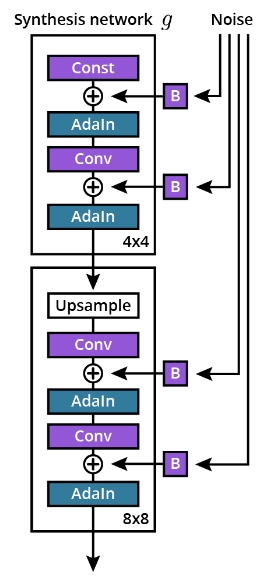

### Instance Normalization

- Batch norm: calculate the norm and variance over the batch dimension and spatial dimension. One pair of values for each channel.
- Instance norm: calculate the mean and variance over the spatial dimensions only. One pair of values for each channel and each element of the batch.

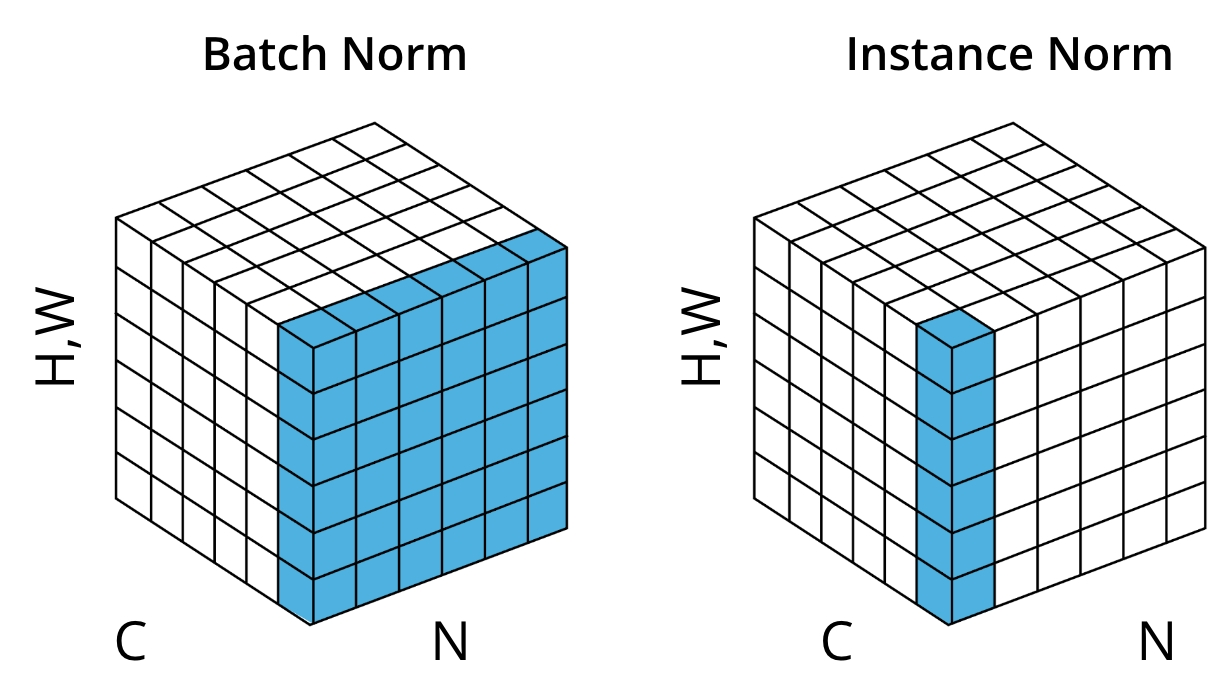



No free lunch theorem! Experiment, evaluate and repeat! Start with a simple solution and only get rid of of when more complex one outperforms.